In [1]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)


**credit card data**
* Contains bank transaction data specifically curated for fraud detection analysi
    - Time: The number of seconds elapsed between this transaction and the first transaction in the dataset.
    - V1 to V28: These are anonymized features resulting from a PCA transformation. Their exact nature is not disclosed for privacy reasons, but they represent the underlying patterns in the data.
    - Amount: The transaction amount in dollars.
    - Class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.


In [2]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'creditcard.csv')
# Read the CSV file into a DataFrame
card_data = pd.read_csv(file_path)
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Fraud data**
* Includes e-commerce transaction data aimed at identifying fraudulent activitie

In [3]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'Fraud_Data.csv')

# Read the CSV file into a DataFrame
fraud_data = pd.read_csv(file_path)
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


**IpAddress_to_Country data**
* Maps IP addresses to countries
    - lower_bound_ip_address: The lower bound of the IP address range.
    - upper_bound_ip_address: The upper bound of the IP address range.
    - country: The country corresponding to the IP address range.

In [4]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'IpAddress_to_Country.csv')

# Read the CSV file into a DataFrame
ip_data = pd.read_csv(file_path)
ip_data.head()


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


**Handle Missing Values**

In [5]:
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [6]:
ip_data.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [7]:
card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Data Cleaning**

In [8]:
# Assuming df is your DataFrame
duplicate_count = fraud_data.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")


Number of duplicated rows: 0


In [9]:
fraud_data.shape

(151112, 11)

In [10]:
# Assuming df is your DataFrame
duplicate_count = card_data.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")


Number of duplicated rows: 1081


In [11]:
card_data.shape

(284807, 31)

In [12]:
# Assuming df is your DataFrame
duplicate_count = ip_data.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")


Number of duplicated rows: 0


In [13]:
ip_data.shape

(138846, 3)

**Descriptive Analysis**

In [14]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [15]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Exploratory Data Analysis (EDA)**
* Univariate analysis
* Bivariate analysis

In [17]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [18]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [19]:
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'],format='mixed')
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'],format='mixed')
fraud_data


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [20]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [21]:
fraud_data['source'].unique()

array(['SEO', 'Ads', 'Direct'], dtype=object)

**Univariate analysis**

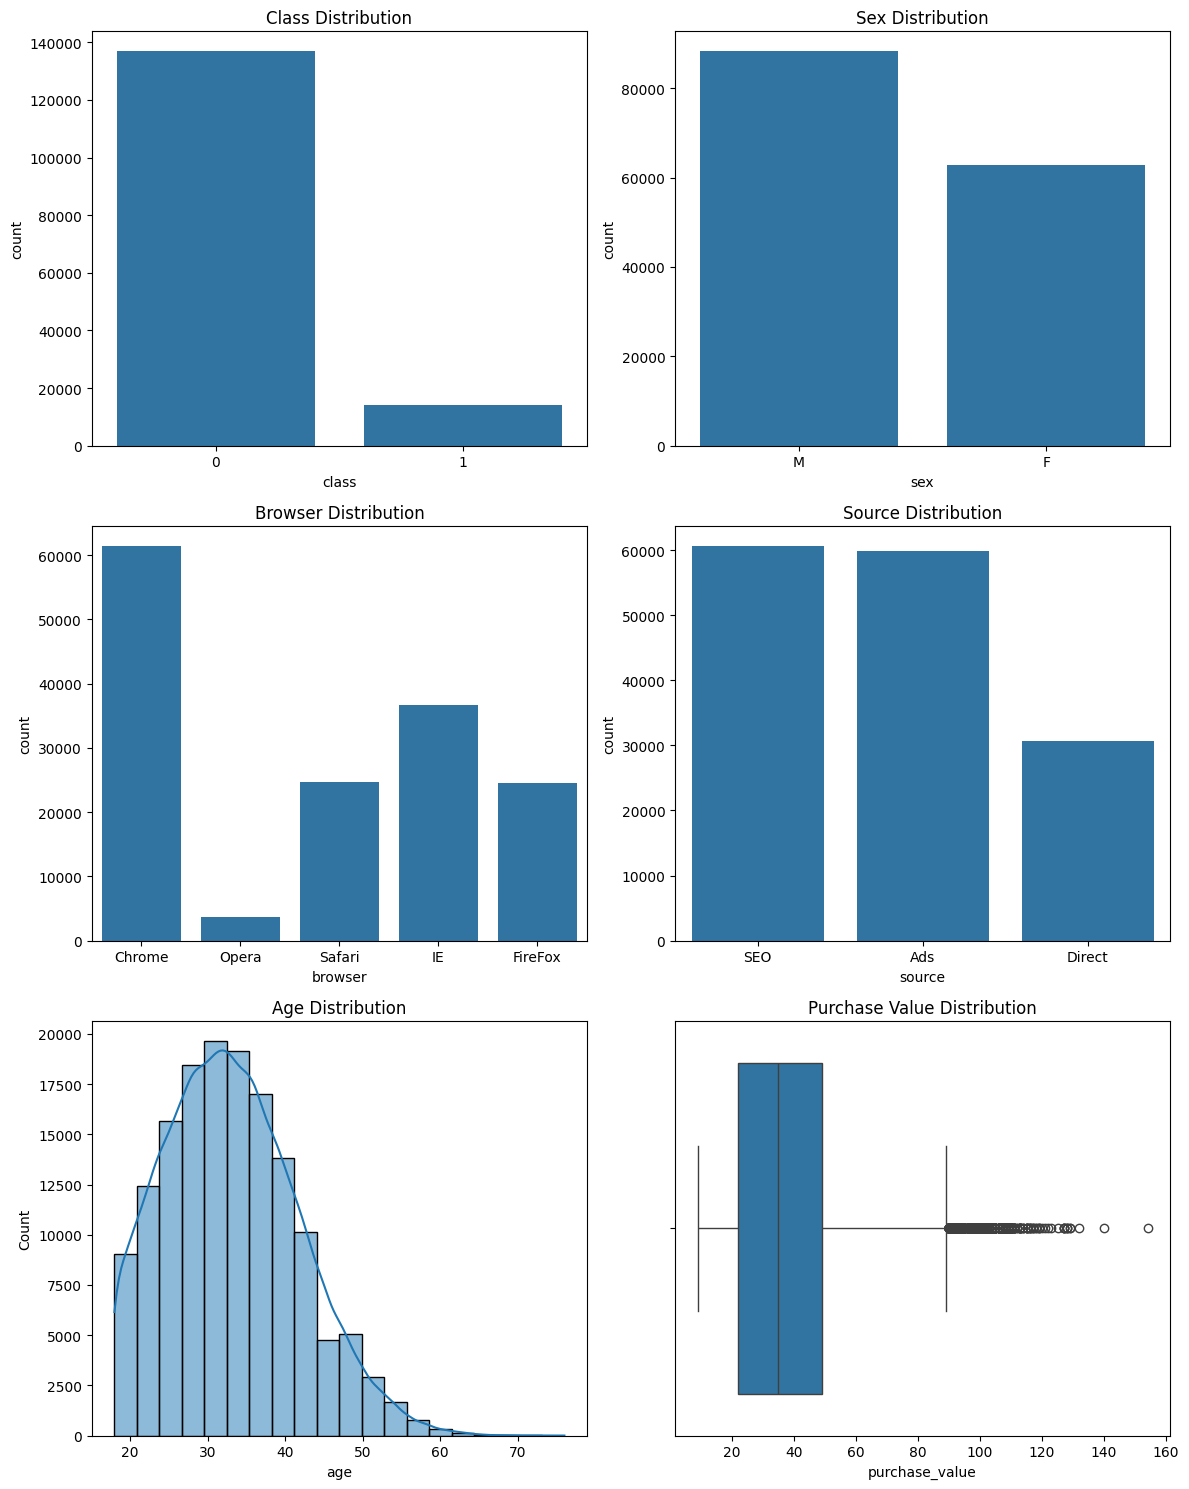

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # Adjust figsize as needed

# Plot for 'class'
sns.countplot(ax=axes[0, 0], x='class', data=fraud_data)
axes[0, 0].set_title('Class Distribution')

# Plot for 'sex'
sns.countplot(ax=axes[0, 1], x='sex', data=fraud_data)
axes[0, 1].set_title('Sex Distribution')

# Plot for 'browser'
sns.countplot(ax=axes[1, 0], x='browser', data=fraud_data)
axes[1, 0].set_title('Browser Distribution')

# Plot for 'source'
sns.countplot(ax=axes[1, 1], x='source', data=fraud_data)
axes[1, 1].set_title('Source Distribution')

# Histogram for 'age'
sns.histplot(ax=axes[2, 0], x=fraud_data['age'], bins=20, kde=True)
axes[2, 0].set_title('Age Distribution')

# Boxplot for 'purchase_value'
sns.boxplot(ax=axes[2, 1], x='purchase_value', data=fraud_data)
axes[2, 1].set_title('Purchase Value Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Bivariate analysis**

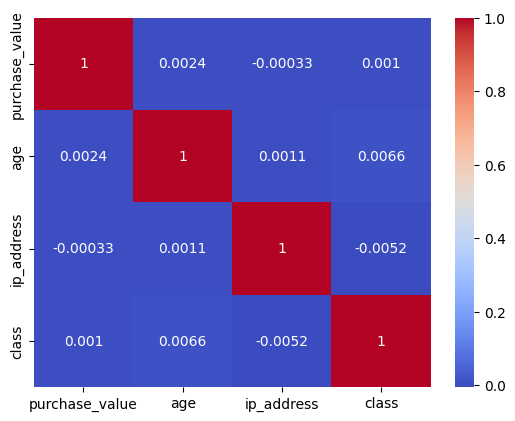

In [23]:
# Correlation between numerical features
correlation = fraud_data[['purchase_value','age','ip_address','class']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

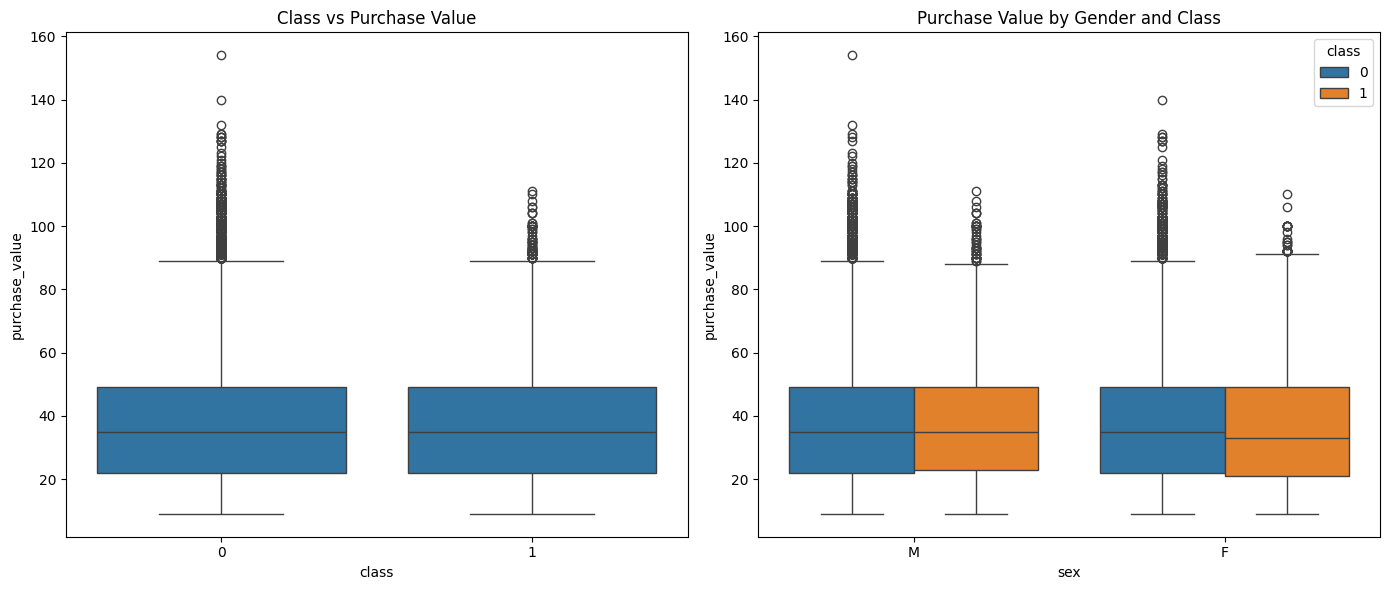

In [24]:
# Create a figure with subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figsize as needed

# Plot for 'class' vs 'purchase_value'
sns.boxplot(ax=axes[0], x='class', y='purchase_value', data=fraud_data)
axes[0].set_title('Class vs Purchase Value')

# Plot for 'purchase_value' by 'sex' with 'class' hue
sns.boxplot(ax=axes[1], x='sex', y='purchase_value', hue='class', data=fraud_data)
axes[1].set_title('Purchase Value by Gender and Class')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Merge Datasets for Geolocation Analysis**

In [25]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [26]:
import pandas as pd
import socket
import struct

# Function to convert integer to IPv4 address
def int_to_ip(ip_num):
    return socket.inet_ntoa(struct.pack('!I', int(ip_num)))

# Apply the conversion to the 'ip_address' column
fraud_data['ip_address'] = fraud_data['ip_address'].apply(int_to_ip)

# Display the converted IP addresses
print(fraud_data)


        user_id         signup_time       purchase_time  purchase_value  \
0         22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1        333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2          1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3        150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4        221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   
...         ...                 ...                 ...             ...   
151107   345170 2015-01-27 03:03:34 2015-03-29 00:30:47              43   
151108   274471 2015-05-15 17:43:29 2015-05-26 12:24:39              35   
151109   368416 2015-03-03 23:07:31 2015-05-20 07:07:47              40   
151110   207709 2015-07-09 20:06:07 2015-09-07 09:34:46              46   
151111   138208 2015-06-10 07:02:20 2015-07-21 02:03:53              20   

            device_id  source browser sex  age       ip_address  class  
0       QVPSPJUOCKZAR     

In [27]:
# Function to convert integer to IPv4 address
def int_to_ip(ip_num):
    return socket.inet_ntoa(struct.pack('!I', int(ip_num)))

# Apply the conversion to both columns
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(int_to_ip)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].apply(int_to_ip)

# Display the converted IP addresip_data)
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.0.0.0,1.0.0.255,Australia
1,1.0.1.0,1.0.1.255,China
2,1.0.2.0,1.0.3.255,China
3,1.0.4.0,1.0.7.255,Australia
4,1.0.8.0,1.0.15.255,China


In [28]:
import ipaddress
# Step 1: Function to convert IP address string to integer
def ip_to_int(ip):
    if isinstance(ip, str):
        return int(ipaddress.ip_address(ip))  # Convert string IP to integer
    return int(ip)  # Convert numeric IP (float) to integer

# Step 2: Apply the conversion function to both lower and upper bound IP columns
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].apply(ip_to_int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].apply(ip_to_int)

# Step 3: Convert fraud_data IP addresses from float to integers
fraud_data['ip_address'] = fraud_data['ip_address'].apply(ip_to_int)

# Step 4: Sort the DataFrames by the appropriate columns
ip_data = ip_data.sort_values(by='lower_bound_ip_address')
fraud_data = fraud_data.sort_values(by='ip_address')

# Step 5: Merge using 'pd.merge_asof' to match IP addresses within the range
merged_df = pd.merge_asof(
    fraud_data,
    ip_data,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'  # Finds the closest lower_bound_ip_address
)

# Step 6: Filter to ensure ip_address falls between lower and upper bounds
merged_df = merged_df[
    (merged_df['ip_address'] >= merged_df['lower_bound_ip_address']) &
    (merged_df['ip_address'] <= merged_df['upper_bound_ip_address'])
]

# Display the result
print(merged_df)

        user_id         signup_time       purchase_time  purchase_value  \
634      247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635      220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636      390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637       69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638      174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   
...         ...                 ...                 ...             ...   
131724    33024 2015-04-12 21:07:04 2015-05-12 22:42:35              56   
131725    62132 2015-08-07 10:46:59 2015-08-27 22:35:23              36   
131726   363333 2015-02-09 07:56:12 2015-03-19 16:55:29              37   
131727   340800 2015-05-10 19:31:22 2015-05-15 09:27:33               9   
131728   244330 2015-01-31 03:06:13 2015-05-23 11:23:39              18   

            device_id  source  browser sex  age  ip_address  class  \
634     KIXYSVCHIPQBR     SEO

In [29]:
merged_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,1.677824e+07,1.677926e+07,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,1.680998e+07,1.684275e+07,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,1.684326e+07,1.684378e+07,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,1.692467e+07,1.694106e+07,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131724,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3757992063,0,3.757965e+09,3.758031e+09,China
131725,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3758008198,0,3.757965e+09,3.758031e+09,China
131726,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3758018545,0,3.757965e+09,3.758031e+09,China
131727,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3758029146,0,3.757965e+09,3.758031e+09,China


In [30]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'merged_data.csv')

# Read the CSV file into a DataFrame
merged_df.to_csv(file_path, index=False)


In [31]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'merged_data.csv')

# Read the CSV file into a DataFrame
merged_df = pd.read_csv(file_path)
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


In [32]:
# Convert to datetime
merged_df['signup_time'] = pd.to_datetime(merged_df['signup_time'])
merged_df['purchase_time'] = pd.to_datetime(merged_df['purchase_time'])

# Calculate transaction time difference
merged_df['time_diff'] = (merged_df['purchase_time'] - merged_df['signup_time']).dt.total_seconds() / 3600

# Extract time-based features
merged_df['hour_of_day'] = merged_df['purchase_time'].dt.hour
merged_df['day_of_week'] = merged_df['purchase_time'].dt.dayofweek

# Frequency and velocity features
merged_df['transaction_count'] = merged_df.groupby('user_id')['purchase_value'].transform('count')


In [33]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_diff,hour_of_day,day_of_week,transaction_count
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia,1008.948611,3,6,1
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand,342.121389,20,2,1
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China,554.870556,23,5,1
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China,2122.471389,16,5,1
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand,2847.105278,4,1,1


In [34]:
merged_df['class'].unique()

array([0, 1])

In [35]:
# Group the data by country and class, counting the occurrences
country_class_count = merged_df.groupby(['country', 'class']).size().reset_index(name='Count')
country_class_count

,country,class,Count
0,Afghanistan,0,5
1,Afghanistan,1,1
2,Albania,0,13
3,Algeria,0,109
4,Algeria,1,13
...,...,...,...
284,Virgin Islands (U.S.),0,2
285,Virgin Islands (U.S.),1,1
286,Yemen,0,1
287,Zambia,0,10


**Top 10 Countries with Highest Number of Fraudulent Transactions**

               country  Count
103      United States   5551
17               China   1043
47               Japan    715
102     United Kingdom    477
50   Korea Republic of    380
15              Canada    348
32              France    300
13              Brazil    270
34             Germany    262
46               Italy    166


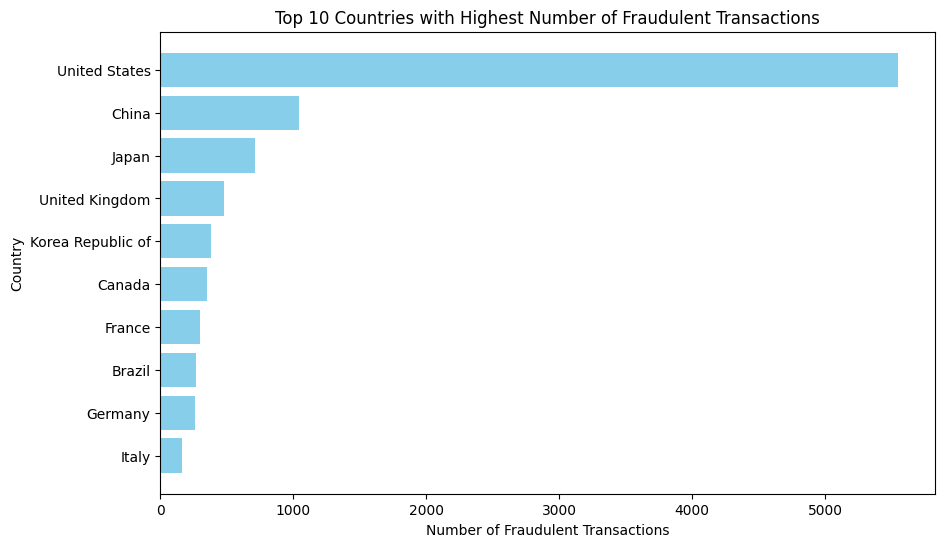

In [36]:
# Assuming 'merged_df' contains 'country' and 'class' columns

# Step 1: Filter the DataFrame for fraudulent transactions (class == 1)
fraud_transactions = merged_df[merged_df['class'] == 1]

# Step 2: Group by country and count the number of fraudulent transactions per country
fraud_by_country = fraud_transactions.groupby('country').size().reset_index(name='Count')

# Step 3: Sort the countries by the number of fraud transactions in descending order
top_10_countries_fraud = fraud_by_country.sort_values(by='Count', ascending=False).head(10)

# Step 4: Print the top 10 countries with the highest number of fraudulent transactions
print(top_10_countries_fraud)

# Step 5: Plot the top 10 countries
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_fraud['country'], top_10_countries_fraud['Count'], color='skyblue')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Number of Fraudulent Transactions')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


**Encoding**

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the selected categorical columns
categorical_columns = ['source', 'browser', 'sex', 'country']

# Loop through each column and apply label encoding
for col in categorical_columns:
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))

# Check the result
print(merged_df[categorical_columns].head())

   source  browser  sex  country
0       2        4    0        7
1       2        0    0      162
2       0        2    1       36
3       1        0    0       36
4       2        0    0      162


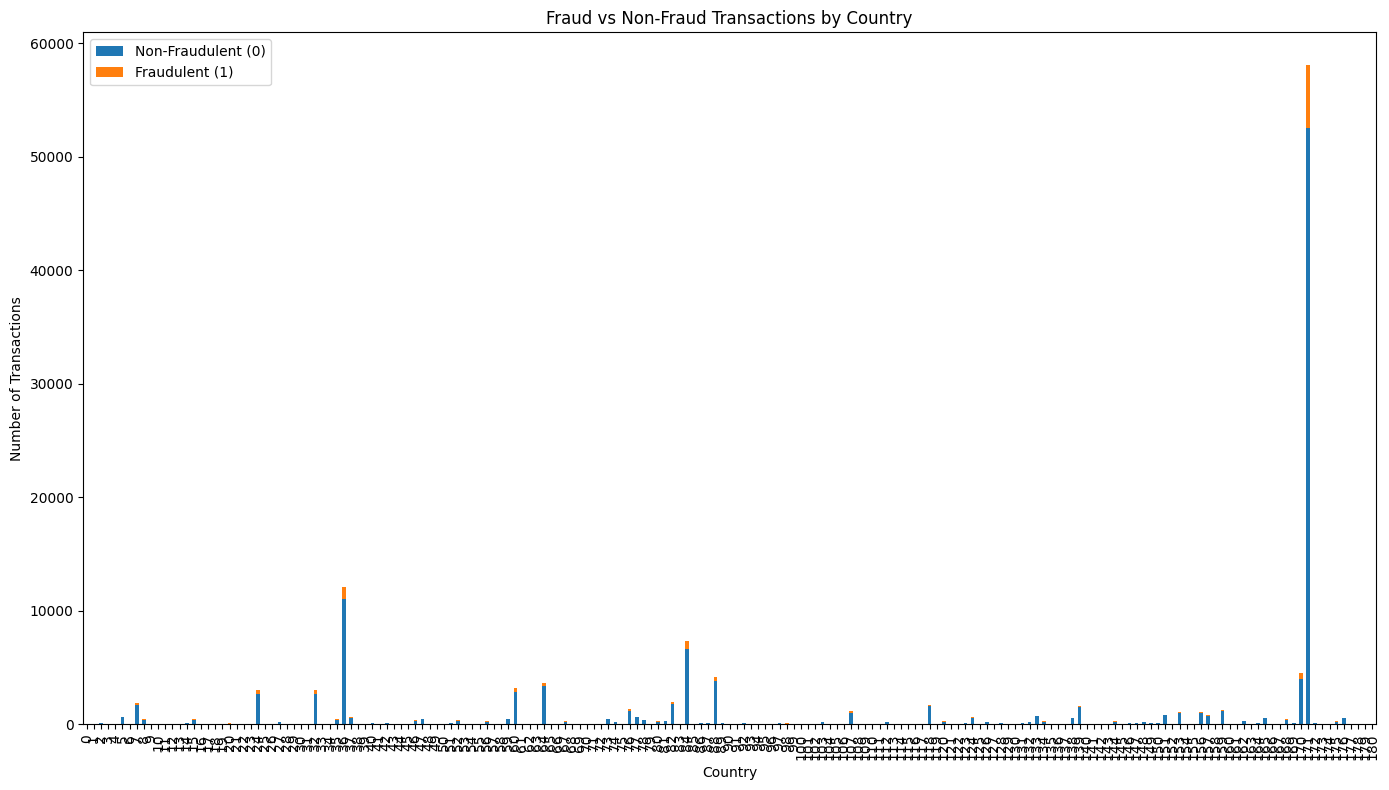

In [38]:
# Group the data by country and class to count occurrences
country_fraud_data = merged_df.groupby(['country', 'class']).size().reset_index(name='counts')

# Pivot the data to get counts for each class (fraud and non-fraud)
country_fraud_pivot = country_fraud_data.pivot(index='country', columns='class', values='counts').fillna(0)

# Plotting
country_fraud_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e'])
plt.title('Fraud vs Non-Fraud Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.tight_layout()
plt.show()
